In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# to read data from csv file.......................................................................
data=pd.read_csv('data/dataset_30_page-blocks.csv')

# to set number of csv in which we want to divid out main csv file..................................
num_of_csv=4

#to set number of cluster in which we want to divid our minority data................................
no_of_cluster=2

#create a list of head from the csv file for data framing............................................
head=['height','lenght','area','eccen','p_black','p_and','mean_tr','blackpix','blackand','wb_trans','class']

#to calculate number of rows in the main csv file....................................................
num_row=data[['class']].count()

#to calculate number of rows in a single csv file after divide main csv file.........................
each_csv_rows=int(num_row/num_of_csv)

#to create first csv file from main csv file ........................................................
csv_1=data[0:each_csv_rows]

#to create second csv file from main csv file ........................................................
csv_2=data[each_csv_rows:each_csv_rows*2]

#to create fourth csv file from main csv file ........................................................
csv_3=data[each_csv_rows*2:each_csv_rows*3]

#to create first csv file from main csv file ........................................................
csv_4=data[each_csv_rows*3:]

ModuleNotFoundError: No module named 'imblearn'

In [46]:
#to find minority and majority of class based on colomn 'class'
csv_1_1=csv_1[csv_1['class']==1]
csv_1_2=csv_1[csv_1['class']==2]
csv_1_3=csv_1[csv_1['class']==3]
csv_1_4=csv_1[csv_1['class']==4]
csv_1_5=csv_1[csv_1['class']==5]
list=[csv_1_1['class'].count(),csv_1_2['class'].count(),csv_1_3['class'].count(),csv_1_4['class'].count(),csv_1_5['class'].count()]
csv_1_min_count=min(list)
if csv_1_min_count==csv_1_1['class'].count():
    csv_1_min=csv_1_1
    csv_1_maj=csv_1_2.append(csv_1_3)
    csv_1_maj=csv_1_maj.append(csv_1_4)
    csv_1_maj=csv_1_maj.append(csv_1_5)
elif csv_1_min_count==csv_1_2['class'].count():
    csv_1_min=csv_1_2
    csv_1_maj=csv_1_1.append(csv_1_3)
    csv_1_maj=csv_1_maj.append(csv_1_4)
    csv_1_maj=csv_1_maj.append(csv_1_5)
elif csv_1_min_count==csv_1_3['class'].count():
    csv_1_min=csv_1_3
    csv_1_maj=csv_1_1.append(csv_1_2)
    csv_1_maj=csv_1_maj.append(csv_1_4)
    csv_1_maj=csv_1_maj.append(csv_1_5)
elif csv_1_min_count==csv_1_4['class'].count():
    csv_1_min=csv_1_4
    csv_1_maj=csv_1_1.append(csv_1_2)
    csv_1_maj=csv_1_maj.append(csv_1_3)
    csv_1_maj=csv_1_maj.append(csv_1_5)
elif csv_1_min_count==csv_1_5['class'].count():
    csv_1_min=csv_1_5
    csv_1_maj=csv_1_1.append(csv_1_2)
    csv_1_maj=csv_1_maj.append(csv_1_3)
    csv_1_maj=csv_1_maj.append(csv_1_4)
    
#minority data from the file csv_1......................................

print(csv_1_min)

csv_1_3['class'].count()

#K-mean Clustering of minority data
kmean_csv_1=KMeans(n_clusters=no_of_cluster)
cluster=kmean_csv_1.fit(csv_1_min)

#to find clusters in minority data
csv_1_cluster=cluster.labels_

print("cluster array")
print(csv_1_cluster)

csv_1_cluster_data=csv_1_min
csv_1_cluster_data['cluster']=csv_1_cluster

print("cluster data with sepret column cluster")
print(csv_1_cluster_data)

#to find data only belong to 0 cluster
print("data belong to only 0 cluster")
csv_1_cluster_0=csv_1_cluster_data[csv_1_cluster_data['cluster']==0]
print(csv_1_cluster_0)

#to find data only belong to 1 cluster
print("data belong to only 1 cluster")
csv_1_cluster_1=csv_1_cluster_data[csv_1_cluster_data['cluster']==1]
print(csv_1_cluster_1)
#tocalculate centroid of the minority data after two clustring 
csv_1_centroid=cluster.cluster_centers_

#to create data-frame of the centroid for add this point in main file for smote
print("centroid from the csv_1 file")
csv_1_centroid_dataframe=pd.DataFrame(csv_1_centroid, columns=head)
print(csv_1_centroid_dataframe)

    height  lenght   area  eccen  p_black  p_and  mean_tr  blackpix  blackand  \
34     168     145  24360  0.863    0.798  0.963    13.06     19430     23457   
35     187     137  25619  0.733    0.899  0.991    29.29     23025     25400   
36     132     547  72204  4.144    0.370  0.483    20.66     26693     34874   
37     178     140  24920  0.787    0.574  0.649    21.52     14292     16177   
38     128     347  44416  2.711    0.399  0.567    13.07     17721     25163   
39     168     135  22680  0.804    0.820  0.904    62.81     18591     20513   

    wb_trans  class  
34      1488      3  
35       786      3  
36      1292      3  
37       664      3  
38      1356      3  
39       296      3  
cluster array
[0 0 1 0 0 0]
cluster data with sepret column cluster
    height  lenght   area  eccen  p_black  p_and  mean_tr  blackpix  blackand  \
34     168     145  24360  0.863    0.798  0.963    13.06     19430     23457   
35     187     137  25619  0.733    0.899  0.991

c:\users\sk computer\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
#to find minority and majority of class based on colomn 'class'
csv_2_1=csv_2[csv_2['class']==1]
csv_2_2=csv_2[csv_2['class']==2]
csv_2_3=csv_2[csv_2['class']==3]
csv_2_4=csv_2[csv_2['class']==4]
csv_2_5=csv_2[csv_2['class']==5]
list=[csv_2_1['class'].count(),csv_2_2['class'].count(),csv_2_3['class'].count(),csv_2_4['class'].count(),csv_2_5['class'].count()]
csv_2_min_count=min(list)
if csv_2_min_count==csv_2_1['class'].count():
    csv_2_min=csv_2_1
    csv_2_maj=csv_2_2.append(csv_2_3)
    csv_2_maj=csv_2_maj.append(csv_2_4)
    csv_2_maj=csv_2_maj.append(csv_2_5)
elif csv_2_min_count==csv_2_2['class'].count():
    csv_2_min=csv_2_2
    csv_2_maj=csv_2_1.append(csv_2_3)
    csv_2_maj=csv_2_maj.append(csv_2_4)
    csv_2_maj=csv_2_maj.append(csv_2_5)
elif csv_2_min_count==csv_2_3['class'].count():
    csv_2_min=csv_2_3
    csv_2_maj=csv_2_1.append(csv_2_2)
    csv_2_maj=csv_2_maj.append(csv_2_4)
    csv_2_maj=csv_2_maj.append(csv_2_5)
elif csv_2_min_count==csv_2_4['class'].count():
    csv_2_min=csv_2_4
    csv_2_maj=csv_2_1.append(csv_2_2)
    csv_2_maj=csv_2_maj.append(csv_2_3)
    csv_2_maj=csv_2_maj.append(csv_2_5)
elif csv_2_min_count==csv_2_5['class'].count():
    csv_2_min=csv_2_5
    csv_2_maj=csv_2_1.append(csv_2_2)
    csv_2_maj=csv_2_maj.append(csv_2_3)
    csv_2_maj=csv_2_maj.append(csv_2_4)
    
#minority data from the file csv_1......................................

print(csv_2_min)

csv_2_3['class'].count()

#K-mean Clustering of minority data
kmean_csv_2=KMeans(n_clusters=no_of_cluster)
cluster=kmean_csv_2.fit(csv_2_min)

#to find clusters in minority data
csv_2_cluster=cluster.labels_

print("cluster array")
print(csv_2_cluster)

csv_2_cluster_data=csv_2_min
csv_2_cluster_data['cluster']=csv_2_cluster

print("cluster data with sepret column cluster")
print(csv_2_cluster_data)

#to find data only belong to 0 cluster
print("data belong to only 0 cluster")
csv_2_cluster_0=csv_2_cluster_data[csv_2_cluster_data['cluster']==0]
print(csv_2_cluster_0)

#to find data only belong to 1 cluster
print("data belong to only 1 cluster")
csv_2_cluster_1=csv_2_cluster_data[csv_2_cluster_data['cluster']==1]
print(csv_2_cluster_1)
#tocalculate centroid of the minority data after two clustring 
csv_2_centroid=cluster.cluster_centers_

#to create data-frame of the centroid for add this point in main file for smote
print("centroid from the csv_1 file")
csv_2_centroid_dataframe=pd.DataFrame(csv_2_centroid, columns=head)
print(csv_2_centroid_dataframe)

NameError: name 'csv_2' is not defined

In [48]:
#to find minority and majority of class based on colomn 'class'
csv_3_1=csv_3[csv_3['class']==1]
csv_3_2=csv_3[csv_3['class']==2]
csv_3_3=csv_3[csv_3['class']==3]
csv_3_4=csv_3[csv_3['class']==4]
csv_3_5=csv_3[csv_3['class']==5]
list=[csv_3_1['class'].count(),csv_3_2['class'].count(),csv_3_3['class'].count(),csv_3_4['class'].count(),csv_3_5['class'].count()]
csv_3_min_count=min(list)
if csv_3_min_count==csv_3_1['class'].count():
    csv_3_min=csv_3_1
    csv_3_maj=csv_3_2.append(csv_3_3)
    csv_3_maj=csv_3_maj.append(csv_3_4)
    csv_3_maj=csv_3_maj.append(csv_3_5)
elif csv_3_min_count==csv_3_2['class'].count():
    csv_3_min=csv_3_2
    csv_3_maj=csv_3_1.append(csv_3_3)
    csv_3_maj=csv_3_maj.append(csv_3_4)
    csv_3_maj=csv_3_maj.append(csv_3_5)
elif csv_3_min_count==csv_3_3['class'].count():
    csv_3_min=csv_3_3
    csv_3_maj=csv_3_1.append(csv_3_2)
    csv_3_maj=csv_3_maj.append(csv_3_4)
    csv_3_maj=csv_3_maj.append(csv_3_5)
elif csv_3_min_count==csv_3_4['class'].count():
    csv_3_min=csv_3_4
    csv_3_maj=csv_3_1.append(csv_3_2)
    csv_3_maj=csv_3_maj.append(csv_3_3)
    csv_3_maj=csv_3_maj.append(csv_3_5)
elif csv_3_min_count==csv_3_5['class'].count():
    csv_3_min=csv_3_5
    csv_3_maj=csv_3_1.append(csv_3_2)
    csv_3_maj=csv_3_maj.append(csv_3_3)
    csv_3_maj=csv_3_maj.append(csv_3_4)
    
#minority data from the file csv_1......................................

print(csv_3_min)

test=csv_3_min['class'].count()
print(test)

#K-mean Clustering of minority data
kmean_csv_3=KMeans(n_clusters=no_of_cluster)
cluster=kmean_csv_3.fit(csv_3_min)

#to find clusters in minority data
csv_3_cluster=cluster.labels_

print("cluster array")
print(csv_3_cluster)

csv_3_cluster_data=csv_3_min
csv_3_cluster_data['cluster']=csv_3_cluster

print("cluster data with sepret column cluster")
print(csv_3_cluster_data)

#to find data only belong to 0 cluster
print("data belong to only 0 cluster")
csv_3_cluster_0=csv_3_cluster_data[csv_3_cluster_data['cluster']==0]
print(csv_3_cluster_0)

#to find data only belong to 1 cluster
print("data belong to only 1 cluster")
csv_3_cluster_1=csv_3_cluster_data[csv_3_cluster_data['cluster']==1]
print(csv_3_cluster_1)
#tocalculate centroid of the minority data after two clustring 
csv_3_centroid=cluster.cluster_centers_

#to create data-frame of the centroid for add this point in main file for smote
print("centroid from the csv_1 file")
csv_3_centroid_dataframe=pd.DataFrame(csv_3_centroid, columns=head)
print(csv_3_centroid_dataframe)

      height  lenght  area  eccen  p_black  p_and  mean_tr  blackpix  \
3561      28      31   868  1.107    0.492  0.745     7.49       427   
3616      28      32   896  1.143    0.481  0.742     7.43       431   
3672      29      31   899  1.069    0.463  0.726     6.93       416   
3714      28      32   896  1.143    0.488  0.743     7.05       437   
3768      28      32   896  1.143    0.462  0.722     7.02       414   
3919      28      31   868  1.107    0.508  0.767     7.47       441   

      blackand  wb_trans  class  
3561       647        57      3  
3616       665        58      3  
3672       653        60      3  
3714       666        62      3  
3768       647        59      3  
3919       666        59      3  
6
cluster array
[1 0 0 0 0 1]
cluster data with sepret column cluster
      height  lenght  area  eccen  p_black  p_and  mean_tr  blackpix  \
3561      28      31   868  1.107    0.492  0.745     7.49       427   
3616      28      32   896  1.143    0.481 

c:\users\sk computer\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
#to find minority and majority of class based on colomn 'class'
csv_4_1=csv_4[csv_4['class']==1]
csv_4_2=csv_4[csv_4['class']==2]
csv_4_3=csv_4[csv_4['class']==3]
csv_4_4=csv_4[csv_4['class']==4]
csv_4_5=csv_4[csv_4['class']==5]
list=[csv_4_1['class'].count(),csv_4_2['class'].count(),csv_4_3['class'].count(),csv_4_4['class'].count(),csv_4_5['class'].count()]
csv_4_min_count=min(list)
if csv_4_min_count==csv_4_1['class'].count():
    csv_4_min=csv_4_1
    csv_4_maj=csv_4_2.append(csv_4_3)
    csv_4_maj=csv_4_maj.append(csv_4_4)
    csv_4_maj=csv_4_maj.append(csv_4_5)
elif csv_4_min_count==csv_4_2['class'].count():
    csv_4_min=csv_4_2
    csv_4_maj=csv_4_1.append(csv_4_3)
    csv_4_maj=csv_4_maj.append(csv_4_4)
    csv_4_maj=csv_4_maj.append(csv_4_5)
elif csv_4_min_count==csv_4_3['class'].count():
    csv_4_min=csv_4_3
    csv_4_maj=csv_4_1.append(csv_4_2)
    csv_4_maj=csv_4_maj.append(csv_4_4)
    csv_4_maj=csv_4_maj.append(csv_4_5)
elif csv_4_min_count==csv_4_4['class'].count():
    csv_4_min=csv_4_4
    csv_4_maj=csv_4_1.append(csv_4_2)
    csv_4_maj=csv_4_maj.append(csv_4_3)
    csv_4_maj=csv_4_maj.append(csv_4_5)
elif csv_4_min_count==csv_4_5['class'].count():
    csv_4_min=csv_4_5
    csv_4_maj=csv_4_1.append(csv_4_2)
    csv_4_maj=csv_4_maj.append(csv_4_3)
    csv_4_maj=csv_4_maj.append(csv_4_4)
    
#minority data from the file csv_1......................................

print(csv_4_min)

test=csv_4_min['class'].count()
print(test)

#K-mean Clustering of minority data
kmean_csv_4=KMeans(n_clusters=no_of_cluster)
cluster=kmean_csv_4.fit(csv_4_min)

#to find clusters in minority data
csv_4_cluster=cluster.labels_

print("cluster array")
print(csv_4_cluster)

csv_4_cluster_data=csv_4_min
csv_4_cluster_data['cluster']=csv_4_cluster

print("cluster data with sepret column cluster")
print(csv_4_cluster_data)

#to find data only belong to 0 cluster
print("data belong to only 0 cluster")
csv_4_cluster_0=csv_4_cluster_data[csv_4_cluster_data['cluster']==0]
print(csv_4_cluster_0)

#to find data only belong to 1 cluster
print("data belong to only 1 cluster")
csv_4_cluster_1=csv_4_cluster_data[csv_4_cluster_data['cluster']==1]
print(csv_4_cluster_1)
#tocalculate centroid of the minority data after two clustring 
csv_4_centroid=cluster.cluster_centers_

#to create data-frame of the centroid for add this point in main file for smote
print("centroid from the csv_1 file")
csv_4_centroid_dataframe=pd.DataFrame(csv_4_centroid, columns=head)
print(csv_4_centroid_dataframe)

NameError: name 'csv_4' is not defined

minority data befor clusturing (6, 12)
majority data befor clusturing (1318, 11)
centroid  (2, 11)
minority data after adding centroid  (14, 12)
afte clusturing data   (1332, 12)
befor SMOTE y_train (1332, 1)
after SMOTE y_train (2464,)
after SMOTE class=1 (1146, 1)
after SMOTE class=2 (120, 1)
after SMOTE class=1 (1146, 1)
after SMOTE class=2 (26, 1)
after SMOTE class=1 (26, 1)


c:\users\sk computer\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
c:\users\sk computer\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


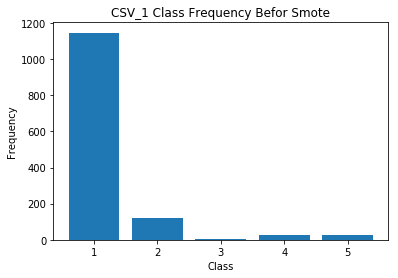

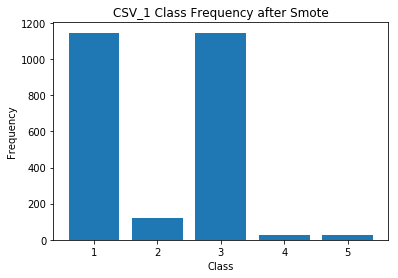

In [50]:
csv_1_cluster_min=csv_1_min.append(csv_1_centroid_dataframe)
csv_1_cluster_min=csv_1_cluster_min.append(csv_2_centroid_dataframe)
csv_1_cluster_min=csv_1_cluster_min.append(csv_3_centroid_dataframe)
csv_1_cluster_min=csv_1_cluster_min.append(csv_4_centroid_dataframe)
csv_1_final=csv_1_cluster_min
csv_1_final=csv_1_final.append(csv_1_maj)
csv_1_final['class'].count()
#SMOTE Calculation 
smt=SMOTE(random_state=10)
csv_1_X=csv_1_final[['height', 'lenght']]
csv_1_y=csv_1_final[['class']]
csv_1_X_train, csc_1_x_test, csv_1_y_train, csv_1_y_test=train_test_split(csv_1_X,csv_1_y, test_size=0.0)

csv_1_smt=SMOTE(random_state=10, sampling_strategy='minority')

csv_1_X_res, csv_1_y_res=csv_1_smt.fit_sample(csv_1_X_train, csv_1_y_train)

csv_1_y_data_frame=pd.DataFrame(csv_1_y_res, columns=['class'])

csv_1_y_1=csv_1_y_data_frame[csv_1_y_data_frame['class']==1]

csv_1_y_2=csv_1_y_data_frame[csv_1_y_data_frame['class']==2]

csv_1_y_3=csv_1_y_data_frame[csv_1_y_data_frame['class']==3]

csv_1_y_4=csv_1_y_data_frame[csv_1_y_data_frame['class']==4]

csv_1_y_5=csv_1_y_data_frame[csv_1_y_data_frame['class']==5]

print("minority data befor clusturing {}".format(csv_1_min.shape))
print("majority data befor clusturing {}".format(csv_1_maj.shape))
print("centroid  {}".format(csv_1_centroid_dataframe.shape))
print("minority data after adding centroid  {}".format(csv_1_cluster_min.shape))
print("afte clusturing data   {}".format(csv_1_final.shape))
print("befor SMOTE y_train {}".format(csv_1_y_train.shape))
print("after SMOTE y_train {}".format(csv_1_y_res.shape))
print("after SMOTE class=1 {}".format(csv_1_y_1.shape))
print("after SMOTE class=2 {}".format(csv_1_y_2.shape))
print("after SMOTE class=1 {}".format(csv_1_y_3.shape))
print("after SMOTE class=2 {}".format(csv_1_y_4.shape))
print("after SMOTE class=1 {}".format(csv_1_y_5.shape))

classes=csv_1['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_1 Class Frequency Befor Smote')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

classes=csv_1_y_data_frame['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_1 Class Frequency after Smote')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 'o']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
X_scatter=csv_1_X_train.values
y_scatter= csv_1_final['class'].values
#plot_2d_space(X_scatter,y_scatter, 'Befor smote')
#plot_2d_space(csv_1_X_res, csv_1_y_res, 'After Smote')

In [4]:
csv_2_cluster_min=csv_2_min.append(csv_2_centroid_dataframe)
csv_2_cluster_min=csv_2_cluster_min.append(csv_1_centroid_dataframe)
csv_2_cluster_min=csv_2_cluster_min.append(csv_3_centroid_dataframe)
csv_2_cluster_min=csv_2_cluster_min.append(csv_4_centroid_dataframe)
csv_2_final=csv_2_cluster_min
csv_2_final=csv_2_final.append(csv_2_maj)
csv_2_final['class'].count()
#SMOTE Calculation 
smt=SMOTE(random_state=10)
csv_2_X=csv_2_final[['height', 'lenght']]
csv_2_y=csv_2_final[['class']]
csv_2_X_train, csc_2_x_train, csv_2_y_train, csv_2_y_test=train_test_split(csv_2_X,csv_2_y, test_size=0.0)
csv_2_smt=SMOTE(random_state=10, sampling_strategy='minority')
csv_2_X_res, csv_2_y_res=csv_2_smt.fit_sample(csv_2_X_train, csv_2_y_train)
csv_2_y_data_frame=pd.DataFrame(csv_2_y_res, columns=['class'])

csv_2_y_1=csv_2_y_data_frame[csv_2_y_data_frame['class']==1]
csv_2_y_2=csv_2_y_data_frame[csv_2_y_data_frame['class']==2]
csv_2_y_3=csv_2_y_data_frame[csv_2_y_data_frame['class']==3]
csv_2_y_4=csv_2_y_data_frame[csv_2_y_data_frame['class']==4]
csv_2_y_5=csv_2_y_data_frame[csv_2_y_data_frame['class']==5]


print("minority data befor clusturing {}".format(csv_2_min.shape))
print("majority data befor clusturing {}".format(csv_2_maj.shape))
print("centroid  {}".format(csv_2_centroid_dataframe.shape))
print("minority data after adding centroid  {}".format(csv_2_cluster_min.shape))
print("afte clusturing data   {}".format(csv_2_final.shape))
print("befor SMOTE y_train {}".format(csv_2_y_train.shape))

print("after SMOTE y_train {}".format(csv_2_y_res.shape))
print("after SMOTE class=1 {}".format(csv_2_y_1.shape))
print("after SMOTE class=2 {}".format(csv_2_y_2.shape))
print("after SMOTE class=3 {}".format(csv_2_y_3.shape))
print("after SMOTE class=4 {}".format(csv_2_y_4.shape))
print("after SMOTE class=5 {}".format(csv_2_y_5.shape))

classes=csv_2['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_2 Class Frequency Befor Smote')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

classes=csv_2_y_data_frame['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_2 Class Frequency after Smote')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

X_scatter=csv_2_X_train.values
y_scatter= csv_2_final['class'].values
#plot_2d_space(X_scatter,y_scatter, 'Befor smote')
#plot_2d_space(csv_2_X_res, csv_2_y_res, 'After Smote')

NameError: name 'csv_2_min' is not defined

minority data befor clusturing (6, 12)
majority data befor clusturing (1318, 11)
centroid  (2, 11)
minority data after adding centroid  (14, 12)
afte clusturing data   (1332, 12)
befor SMOTE y_train (1332, 1)
after SMOTE y_train (2557,)
after SMOTE class=1 (1239, 1)
after SMOTE class=2 (46, 1)
after SMOTE class=3 (1239, 1)
after SMOTE class=4 (15, 1)
after SMOTE class=5 (18, 1)


c:\users\sk computer\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
c:\users\sk computer\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


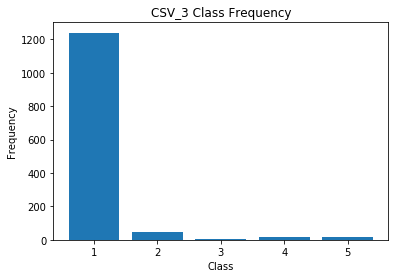

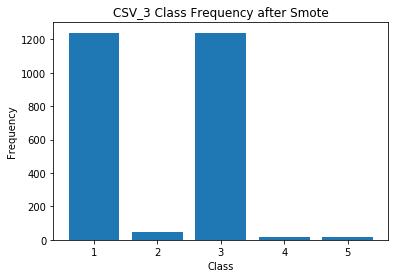

In [52]:
csv_3_cluster_min=csv_3_min.append(csv_3_centroid_dataframe)
csv_3_cluster_min=csv_3_cluster_min.append(csv_2_centroid_dataframe)
csv_3_cluster_min=csv_3_cluster_min.append(csv_1_centroid_dataframe)
csv_3_cluster_min=csv_3_cluster_min.append(csv_1_centroid_dataframe)
csv_3_final=csv_3_cluster_min
csv_3_final=csv_3_final.append(csv_3_maj)
csv_3_final['class'].count()
#SMOTE Calculation 
smt=SMOTE(random_state=10)
csv_3_X=csv_3_final[['height', 'lenght']]
csv_3_y=csv_3_final[['class']]
csv_3_X_train, csc_3_x_train, csv_3_y_train, csv_3_y_test=train_test_split(csv_3_X,csv_3_y, test_size=0.0)
csv_3_smt=SMOTE(random_state=10, sampling_strategy='minority')
csv_3_X_res, csv_3_y_res=csv_3_smt.fit_sample(csv_3_X_train, csv_3_y_train)
csv_3_y_data_frame=pd.DataFrame(csv_3_y_res, columns=['class'])

csv_3_y_1=csv_3_y_data_frame[csv_3_y_data_frame['class']==1]
csv_3_y_2=csv_3_y_data_frame[csv_3_y_data_frame['class']==2]
csv_3_y_3=csv_3_y_data_frame[csv_3_y_data_frame['class']==3]
csv_3_y_4=csv_3_y_data_frame[csv_3_y_data_frame['class']==4]
csv_3_y_5=csv_3_y_data_frame[csv_3_y_data_frame['class']==5]


print("minority data befor clusturing {}".format(csv_3_min.shape))
print("majority data befor clusturing {}".format(csv_3_maj.shape))
print("centroid  {}".format(csv_3_centroid_dataframe.shape))
print("minority data after adding centroid  {}".format(csv_3_cluster_min.shape))
print("afte clusturing data   {}".format(csv_3_final.shape))
print("befor SMOTE y_train {}".format(csv_3_y_train.shape))
print("after SMOTE y_train {}".format(csv_3_y_res.shape))
print("after SMOTE class=1 {}".format(csv_3_y_1.shape))
print("after SMOTE class=2 {}".format(csv_3_y_2.shape))
print("after SMOTE class=3 {}".format(csv_3_y_3.shape))
print("after SMOTE class=4 {}".format(csv_3_y_4.shape))
print("after SMOTE class=5 {}".format(csv_3_y_5.shape))


classes=csv_3['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_3 Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

classes=csv_3_y_data_frame['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_3 Class Frequency after Smote')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

X_scatter=csv_3_X_train.values
y_scatter= csv_3_final['class'].values
#plot_2d_space(X_scatter,y_scatter, 'Befor smote')
#plot_2d_space(csv_3_X_res, csv_3_y_res, 'After Smote')

In [10]:
csv_4_cluster_min=csv_4_min.append(csv_4_centroid_dataframe)
csv_4_cluster_min=csv_4_cluster_min.append(csv_3_centroid_dataframe)
csv_4_cluster_min=csv_4_cluster_min.append(csv_2_centroid_dataframe)
csv_4_cluster_min=csv_4_cluster_min.append(csv_1_centroid_dataframe)
csv_4_final=csv_4_cluster_min
csv_4_final=csv_4_final.append(csv_4_maj)
csv_4_final['class'].count()
#SMOTE Calculation 
smt=SMOTE(random_state=10)
csv_4_X=csv_4_final[['height', 'lenght']]
csv_4_y=csv_4_final[['class']]
csv_4_X_train, csc_4_x_train, csv_4_y_train, csv_4_y_test=train_test_split(csv_4_X,csv_4_y, test_size=0.0)
csv_4_smt=SMOTE(random_state=10, sampling_strategy='minority')
csv_4_X_res, csv_4_y_res=csv_4_smt.fit_sample(csv_4_X_train, csv_4_y_train)
csv_4_y_data_frame=pd.DataFrame(csv_4_y_res, columns=['class'])
csv_4_y_0=csv_4_y_data_frame[csv_4_y_data_frame['class']==0]
csv_4_y_1=csv_4_y_data_frame[csv_4_y_data_frame['class']==1]
print("minority data befor clusturing {}".format(csv_4_min.shape))
print("majority data befor clusturing {}".format(csv_4_maj.shape))
print("centroid  {}".format(csv_4_centroid_dataframe.shape))
print("minority data after adding centroid  {}".format(csv_4_cluster_min.shape))
print("afte clusturing data   {}".format(csv_4_final.shape))
print("befor SMOTE y_train {}".format(csv_4_y_train.shape))
print("after SMOTE y_train {}".format(csv_4_y_res.shape))
print("after SMOTE bug=1 {}".format(csv_4_y_0.shape))
print("after SMOTE bug=0 {}".format(csv_4_y_1.shape))

classes=csv_4['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_4 Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

classes=csv_4_y_data_frame['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_4 Class Frequency after Smote')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

X_scatter=csv_4_X_train.values
y_scatter= csv_4_final['class'].values
#plot_2d_space(X_scatter,y_scatter, 'Befor smote')
#plot_2d_space(csv_4_X_res, csv_4_y_res, 'After Smote')

NameError: name 'csv_4_min' is not defined

In [5]:
csv_1_cluster_min=csv_1_min.append(csv_1_centroid_dataframe)
csv_1_cluster_min=csv_1_cluster_min.append(csv_2_centroid_dataframe)
csv_1_cluster_min=csv_1_cluster_min.append(csv_3_centroid_dataframe)
csv_1_cluster_min=csv_1_cluster_min.append(csv_4_centroid_dataframe)
csv_1_final=csv_1_cluster_min
csv_1_final=csv_1_final.append(csv_1_maj)
csv_1_final['class'].count()
#SMOTE Calculation 
smt=SMOTE(random_state=10)
csv_1_X=csv_1_final[['height','lenght','area','eccen','p_black','p_and','mean_tr','blackpix','blackand','wb_trans']]
csv_1_y=csv_1_final[['class']]
csv_1_X_train, csc_1_x_test, csv_1_y_train, csv_1_y_test=train_test_split(csv_1_X,csv_1_y, test_size=0.0)

csv_1_smt=SMOTE(random_state=10, sampling_strategy='minority')

csv_1_X_res, csv_1_y_res=csv_1_smt.fit_sample(csv_1_X_train, csv_1_y_train)

csv_1_y_data_frame=pd.DataFrame(csv_1_y_res, columns=['class'])

csv_1_y_0=csv_1_y_data_frame[csv_1_y_data_frame['class']==0]

csv_1_y_1=csv_1_y_data_frame[csv_1_y_data_frame['class']==1]

print("minority data befor clusturing {}".format(csv_1_min.shape))
print("majority data befor clusturing {}".format(csv_1_maj.shape))
print("centroid  {}".format(csv_1_centroid_dataframe.shape))
print("minority data after adding centroid  {}".format(csv_1_cluster_min.shape))
print("afte clusturing data   {}".format(csv_1_final.shape))
print("befor SMOTE y_train {}".format(csv_1_y_train.shape))
print("after SMOTE y_train {}".format(csv_1_y_res.shape))
print("after SMOTE bug=1 {}".format(csv_1_y_0.shape))
print("after SMOTE bug=0 {}".format(csv_1_y_1.shape))

classes=csv_1['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_1 Class Frequency Befor Smote')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

classes=csv_1_y_data_frame['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_1 Class Frequency after Smote')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 'o']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
X_scatter=csv_1_X_train.values
y_scatter= csv_1_final['class'].values
#plot_2d_space(X_scatter,y_scatter, 'Befor smote')
#plot_2d_space(csv_1_X_res, csv_1_y_res, 'After Smote')

csv_1_knn=KNeighborsClassifier()
csv_1_knn.fit(csv_1_X_train,csv_1_y_train)
test_data=pd.read_csv('data/page_block_testing_data.csv')
test_data_wc=test_data[['height','lenght','area','eccen','p_black','p_and','mean_tr','blackpix','blackand','wb_trans']]
csv_1_befor_smote_predict=csv_1_knn.predict(test_data_wc)
print("befor SMOTE pridiction")
print(csv_1_befor_smote_predict)
csv_1_knn.fit(csv_1_X_res,csv_1_y_res)
csv_1_after_smote_predict=csv_1_knn.predict(test_data_wc)
print("after SMOTE pridiction")
print(csv_1_after_smote_predict)

NameError: name 'csv_1_min' is not defined

In [6]:
csv_2_cluster_min=csv_2_min.append(csv_2_centroid_dataframe)
csv_2_cluster_min=csv_2_cluster_min.append(csv_1_centroid_dataframe)
csv_2_cluster_min=csv_2_cluster_min.append(csv_3_centroid_dataframe)
csv_2_cluster_min=csv_2_cluster_min.append(csv_4_centroid_dataframe)
csv_2_final=csv_2_cluster_min
csv_2_final=csv_2_final.append(csv_2_maj)
csv_2_final['class'].count()
#SMOTE Calculation 
smt=SMOTE(random_state=10)
csv_2_X=csv_2_final[['height','lenght','area','eccen','p_black','p_and','mean_tr','blackpix','blackand','wb_trans']]
csv_2_y=csv_2_final[['class']]
csv_2_X_train, csc_2_x_train, csv_2_y_train, csv_2_y_test=train_test_split(csv_2_X,csv_2_y, test_size=0.0)
csv_2_smt=SMOTE(random_state=10, sampling_strategy='minority')
csv_2_X_res, csv_2_y_res=csv_2_smt.fit_sample(csv_2_X_train, csv_2_y_train)
csv_2_y_data_frame=pd.DataFrame(csv_2_y_res, columns=['class'])
csv_2_y_0=csv_2_y_data_frame[csv_2_y_data_frame['class']==0]
csv_2_y_1=csv_2_y_data_frame[csv_2_y_data_frame['class']==1]
print("minority data befor clusturing {}".format(csv_2_min.shape))
print("majority data befor clusturing {}".format(csv_2_maj.shape))
print("centroid  {}".format(csv_2_centroid_dataframe.shape))
print("minority data after adding centroid  {}".format(csv_1_cluster_min.shape))
print("afte clusturing data   {}".format(csv_2_final.shape))
print("befor SMOTE y_train {}".format(csv_2_y_train.shape))
print("after SMOTE y_train {}".format(csv_2_y_res.shape))
print("after SMOTE bug=1 {}".format(csv_2_y_0.shape))
print("after SMOTE bug=0 {}".format(csv_2_y_1.shape))

classes=csv_2['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_2 Class Frequency Befor Smote')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

classes=csv_2_y_data_frame['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_2 Class Frequency after Smote')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

X_scatter=csv_2_X_train.values
y_scatter= csv_2_final['class'].values
#plot_2d_space(X_scatter,y_scatter, 'Befor smote')
#plot_2d_space(csv_2_X_res, csv_2_y_res, 'After Smote')

csv_2_knn=KNeighborsClassifier()
csv_2_knn.fit(csv_2_X_train,csv_2_y_train)
csv_2_befor_smote_predict=csv_2_knn.predict(test_data_wc)
print("befor SMOTE pridiction")
print(csv_2_befor_smote_predict)
csv_2_knn.fit(csv_2_X_res,csv_2_y_res)
csv_2_after_smote_predict=csv_2_knn.predict(test_data_wc)
print("after SMOTE pridiction")
print(csv_2_after_smote_predict)

NameError: name 'csv_2_min' is not defined

In [7]:
csv_3_cluster_min=csv_3_min.append(csv_3_centroid_dataframe)
csv_3_cluster_min=csv_3_cluster_min.append(csv_2_centroid_dataframe)
csv_3_cluster_min=csv_3_cluster_min.append(csv_1_centroid_dataframe)
csv_3_cluster_min=csv_3_cluster_min.append(csv_1_centroid_dataframe)
csv_3_final=csv_3_cluster_min
csv_3_final=csv_3_final.append(csv_3_maj)
csv_3_final['class'].count()
#SMOTE Calculation 
smt=SMOTE(random_state=10)
csv_3_X=csv_3_final[['height','lenght','area','eccen','p_black','p_and','mean_tr','blackpix','blackand','wb_trans']]
csv_3_y=csv_3_final[['class']]
csv_3_X_train, csc_3_x_train, csv_3_y_train, csv_3_y_test=train_test_split(csv_3_X,csv_3_y, test_size=0.0)
csv_3_smt=SMOTE(random_state=10, sampling_strategy='minority')
csv_3_X_res, csv_3_y_res=csv_3_smt.fit_sample(csv_3_X_train, csv_3_y_train)
csv_3_y_data_frame=pd.DataFrame(csv_3_y_res, columns=['class'])
csv_3_y_1=csv_3_y_data_frame[csv_3_y_data_frame['class']==1]
csv_3_y_2=csv_3_y_data_frame[csv_3_y_data_frame['class']==2]
csv_3_y_3=csv_3_y_data_frame[csv_3_y_data_frame['class']==3]
csv_3_y_4=csv_3_y_data_frame[csv_3_y_data_frame['class']==4]
csv_3_y_5=csv_3_y_data_frame[csv_3_y_data_frame['class']==5]


print("minority data befor clusturing {}".format(csv_3_min.shape))
print("majority data befor clusturing {}".format(csv_3_maj.shape))
print("centroid  {}".format(csv_3_centroid_dataframe.shape))
print("minority data after adding centroid  {}".format(csv_3_cluster_min.shape))
print("afte clusturing data   {}".format(csv_3_final.shape))
print("befor SMOTE y_train {}".format(csv_3_y_train.shape))
print("after SMOTE y_train {}".format(csv_3_y_res.shape))
print("after SMOTE class=1 {}".format(csv_3_y_1.shape))
print("after SMOTE class=2 {}".format(csv_3_y_2.shape))
print("after SMOTE class=3 {}".format(csv_3_y_3.shape))
print("after SMOTE class=4 {}".format(csv_3_y_4.shape))
print("after SMOTE class=5 {}".format(csv_3_y_5.shape))


classes=csv_3['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_3 Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

classes=csv_3_y_data_frame['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_3 Class Frequency after Smote')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

X_scatter=csv_3_X_train.values
y_scatter= csv_3_final['class'].values
#plot_2d_space(X_scatter,y_scatter, 'Befor smote')
#plot_2d_space(csv_3_X_res, csv_3_y_res, 'After Smote')

csv_3_knn=KNeighborsClassifier()
csv_3_knn.fit(csv_3_X_train,csv_3_y_train)
csv_3_befor_smote_predict=csv_3_knn.predict(test_data_wc)
print("befor SMOTE pridiction")
print(csv_3_befor_smote_predict)
csv_3_knn.fit(csv_3_X_res,csv_3_y_res)
csv_3_after_smote_predict=csv_3_knn.predict(test_data_wc)
print("after SMOTE pridiction")
print(csv_3_after_smote_predict)

NameError: name 'csv_3_min' is not defined

In [9]:
csv_4_cluster_min=csv_4_min.append(csv_4_centroid_dataframe)
csv_4_cluster_min=csv_4_cluster_min.append(csv_3_centroid_dataframe)
csv_4_cluster_min=csv_4_cluster_min.append(csv_2_centroid_dataframe)
csv_4_cluster_min=csv_4_cluster_min.append(csv_1_centroid_dataframe)
csv_4_final=csv_4_cluster_min
csv_4_final=csv_4_final.append(csv_4_maj)
csv_4_final['class'].count()
#SMOTE Calculation 
smt=SMOTE(random_state=10)
csv_4_X=csv_4_final[['height','lenght','area','eccen','p_black','p_and','mean_tr','blackpix','blackand','wb_trans']]
csv_4_y=csv_4_final[['class']]
csv_4_X_train, csc_4_x_train, csv_4_y_train, csv_4_y_test=train_test_split(csv_4_X,csv_4_y, test_size=0.0)
csv_4_smt=SMOTE(random_state=10, sampling_strategy='minority')
csv_4_X_res, csv_4_y_res=csv_4_smt.fit_sample(csv_4_X_train, csv_4_y_train)
csv_4_y_data_frame=pd.DataFrame(csv_4_y_res, columns=['class'])

csv_4_y_1=csv_4_y_data_frame[csv_4_y_data_frame['class']==1]
csv_4_y_2=csv_4_y_data_frame[csv_4_y_data_frame['class']==2]
csv_4_y_3=csv_4_y_data_frame[csv_4_y_data_frame['class']==3]
csv_4_y_4=csv_4_y_data_frame[csv_4_y_data_frame['class']==4]
csv_4_y_5=csv_4_y_data_frame[csv_4_y_data_frame['class']==5]


print("minority data befor clusturing {}".format(csv_4_min.shape))
print("majority data befor clusturing {}".format(csv_4_maj.shape))
print("centroid  {}".format(csv_4_centroid_dataframe.shape))
print("minority data after adding centroid  {}".format(csv_4_cluster_min.shape))
print("afte clusturing data   {}".format(csv_4_final.shape))
print("befor SMOTE y_train {}".format(csv_4_y_train.shape))
print("after SMOTE y_train {}".format(csv_4_y_res.shape))
print("after SMOTE class=1 {}".format(csv_4_y_1.shape))
print("after SMOTE class=2 {}".format(csv_4_y_2.shape))
print("after SMOTE class=3 {}".format(csv_4_y_3.shape))
print("after SMOTE class=4 {}".format(csv_4_y_4.shape))
print("after SMOTE class=5 {}".format(csv_4_y_5.shape))


classes=csv_4['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_4 Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

classes=csv_4_y_data_frame['class'].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('CSV_4 Class Frequency after Smote')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

X_scatter=csv_4_X_train.values
y_scatter= csv_4_final['class'].values
#plot_2d_space(X_scatter,y_scatter, 'Befor smote')
#plot_2d_space(csv_4_X_res, csv_4_y_res, 'After Smote')

csv_4_knn=KNeighborsClassifier()
csv_4_knn.fit(csv_4_X_train,csv_4_y_train)
csv_4_befor_smote_predict=csv_4_knn.predict(test_data_wc)
print("befor SMOTE pridiction")
print(csv_4_befor_smote_predict)
csv_4_knn.fit(csv_4_X_res,csv_4_y_res)
csv_4_after_smote_predict=csv_4_knn.predict(test_data_wc)
print("after SMOTE pridiction")
print(csv_4_after_smote_predict)

NameError: name 'csv_4_min' is not defined